In [2]:
import pandas as pd  # 导入pandas库
import numpy as np  # 导入numpy库

df_titanic = pd.read_csv('./data/titanic/train.csv')  # 读取文件
df_titanic.head()  # 显示前5行数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df_titanic.Survived.value_counts()  # 输出分类值，及各个类别数目
df_titanic['Age'] = df_titanic['Age'].fillna(0)

In [4]:
# 把类别型变量转换为哑变量
a = pd.get_dummies(df_titanic['Sex'], prefix="Sex")
b = pd.get_dummies(df_titanic['Embarked'], prefix="Em")
# 把哑变量添加进dataframe
frames = [df_titanic, a, b]
df_titanic = pd.concat(frames, axis=1)
df_titanic = df_titanic.drop(columns=['Sex', 'Embarked'])
df_titanic.head()  # 显示新的dataframe

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Em_C,Em_Q,Em_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [5]:
X = df_titanic.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)  # 拿掉比较不相关的字段,构建特征集
y = df_titanic.Survived.values  # 构建标签集
y = y.reshape(-1, 1)  # -1是相对索引，等价于len(y)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
from sklearn.preprocessing import StandardScaler  # 导入数据缩放器

scaler = StandardScaler()  # 选择归一化数据缩放器，MinMaxScaler
X_train = scaler.fit_transform(X_train)  # 特征归一化 训练集fit_transform
X_test = scaler.transform(X_test)  # 特征归一化 测试集transform

In [8]:
from sklearn.linear_model import LogisticRegression  #导入逻辑回归模型

lr = LogisticRegression()  # lr,就代表是逻辑回归模型
lr.fit(X_train, y_train)  # fit,就相当于是梯度下降
print("SK-learn逻辑回归测试准确率 {:.2f}%".format(lr.score(X_test, y_test) * 100))

SK-learn逻辑回归测试准确率 83.24%


/Users/ykdsg/miniforge3/envs/SmartInvest/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# 首先定义一个sigmoid函数，输入Z，返回y'
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [10]:
# 然后定义损失函数
def cost_function(X, y, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)  # Sigmoid逻辑函数 + 线性函数（wX+b）得到y'
    #     print (X.shape,w.shape)
    loss = np.abs((y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))  # 计算损失
    #     cost = np.sum(loss) / X.shape[0]  # 返回整个数据集平均损失  
    cost = np.mean(loss)  # 返回整个数据集平均损失
    return cost

In [11]:
def gradient_descent(X, y, w, b, lr, iter):  #定义逻辑回归梯度下降函数
    l_history = np.zeros(iter)  # 初始化记录梯度下降过程中误差值(损失)的数组
    w_history = np.zeros((iter, w.shape[0], w.shape[1]))  # 初始化权重记录的数组
    b_history = np.zeros(iter)  # 初始化记录梯度下降过程中偏置的数组  
    for i in range(iter):  #进行机器训练的迭代
        y_hat = sigmoid(np.dot(X, w) + b)  #Sigmoid逻辑函数+线性函数(wX+b)得到y'
        loss = (y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        derivative_w = np.dot(X.T, ((y_hat - y))) / X.shape[0]  # 给权重向量求导
        derivative_b = np.sum(y_hat - y) / X.shape[0]  # 给偏置求导
        w = w - lr * derivative_w  # 更新权重向量，lr即学习速率alpha
        b = b - lr * derivative_b  # 更新偏置，lr即学习速率alpha
        l_history[i] = cost_function(X, y, w, b)  # 梯度下降过程中的损失
        print("轮次", i + 1, "当前轮训练集损失：", l_history[i])
        w_history[i] = w  # 梯度下降过程中权重的历史 请注意w_history和w的形状
        b_history[i] = b  # 梯度下降过程中偏置的历史
    return l_history, w_history, b_history

In [12]:
def predict(X, w, b):  # 定义预测函数
    z = np.dot(X, w) + b  # 线性函数
    y_hat = sigmoid(z)  # 逻辑函数转换
    y_pred = np.zeros((y_hat.shape[0], 1))  # 初始化预测结果变量    
    for i in range(y_hat.shape[0]):
        if y_hat[i, 0] < 0.5:
            y_pred[i, 0] = 0  # 如果预测概率小于0.5，输出分类0
        else:
            y_pred[i, 0] = 1  # 如果预测概率大于0.5，输出分类0
    return y_pred  # 返回预测分类的结果

In [13]:
def logistic_regression(X, y, w, b, lr, iter):  # 定义逻辑回归模型
    l_history, w_history, b_history = gradient_descent(X, y, w, b, lr, iter)  #梯度下降
    print("训练最终损失:", l_history[-1])  # 打印最终损失
    y_pred = predict(X, w_history[-1], b_history[-1])  # 进行预测
    traning_acc = 100 - np.mean(np.abs(y_pred - y_train)) * 100  # 计算准确率
    print("逻辑回归训练准确率: {:.2f}%".format(traning_acc))  # 打印准确率
    return l_history, w_history, b_history  # 返回训练历史记录

In [18]:
#初始化参数
dimension = X.shape[1]  # 这里的维度 len(X)是矩阵的行的数，维度是列的数目
weight = np.full((dimension, 1), 0.1)  # 权重向量，向量一般是1D，但这里实际上创建了2D张量
bias = 0  # 偏置值
#初始化超参数
alpha = 1  # 学习速率
iterations = 50  # 迭代次数

In [19]:
# 用逻辑回归函数训练机器
loss_history, weight_history, bias_history = logistic_regression(X_train, y_train,
                                                                 weight, bias,
                                                                 alpha, iterations)

轮次 1 当前轮训练集损失： 0.5574358321488168
轮次 2 当前轮训练集损失： 0.5153300237514687
轮次 3 当前轮训练集损失： 0.49656597869016555
轮次 4 当前轮训练集损失： 0.48616094381516595
轮次 5 当前轮训练集损失： 0.4796115990301002
轮次 6 当前轮训练集损失： 0.47515516771839134
轮次 7 当前轮训练集损失： 0.47196611524735926
轮次 8 当前轮训练集损失： 0.4696033618999216
轮次 9 当前轮训练集损失： 0.46780740692718126
轮次 10 当前轮训练集损失： 0.46641464870241794
轮次 11 当前轮训练集损失： 0.46531668617986804
轮次 12 当前轮训练集损失： 0.46443900750299455
轮次 13 当前轮训练集损失： 0.4637289288837939
轮次 14 当前轮训练集损失： 0.4631483466354237
轮次 15 当前轮训练集损失： 0.46266917703477983
轮次 16 当前轮训练集损失： 0.4622703833623684
轮次 17 当前轮训练集损失： 0.4619359820199841
轮次 18 当前轮训练集损失： 0.46165367381169137
轮次 19 当前轮训练集损失： 0.46141388569371633
轮次 20 当前轮训练集损失： 0.46120908834759045
轮次 21 当前轮训练集损失： 0.4610333028017888
轮次 22 当前轮训练集损失： 0.46088173888541983
轮次 23 当前轮训练集损失： 0.4607505270381607
轮次 24 当前轮训练集损失： 0.46063651715166265
轮次 25 当前轮训练集损失： 0.46053712615019426
轮次 26 当前轮训练集损失： 0.460450221419944
轮次 27 当前轮训练集损失： 0.4603740308851917
轮次 28 当前轮训练集损失： 0.46030707308432484
轮次 29 当前轮训练集损失

In [20]:
y_pred = predict(X_test, weight_history[-1], bias_history[-1])  # 预测测试集
testing_acc = 100 - np.mean(np.abs(y_pred - y_test)) * 100  # 计算准确率
print("逻辑回归测试准确率: {:.2f}%".format(testing_acc))

逻辑回归测试准确率: 83.24%


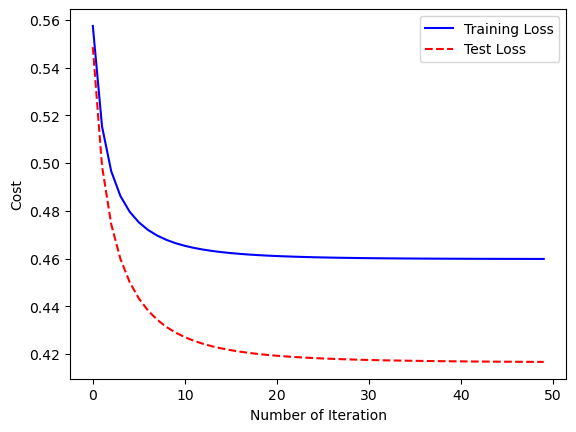

In [21]:
import matplotlib.pyplot as plt  # 导入绘图工具

loss_history_test = np.zeros(iterations)  # 初始化历史损失
for i in range(iterations):  #求训练过程中不同参数带来的测试集损失
    loss_history_test[i] = cost_function(X_test, y_test, weight_history[i], bias_history[i])
index = np.arange(0, iterations, 1)
plt.plot(index, loss_history, c='blue', linestyle='solid')
plt.plot(index, loss_history_test, c='red', linestyle='dashed')
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.show()  # 同时显示显示训练集和测试集损失曲线